In [1]:
import numpy as np
import pandas as pd

In [2]:
d = pd.read_csv("/content/movies.csv")
print(d.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [3]:
d.shape

(9742, 3)

In [7]:
d.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
d1 = pd.read_csv("/content/ratings.csv")
print(d1.shape)

(100836, 4)


In [5]:
d1.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
d1['userId'].nunique()

610

In [9]:
movie_ratings_count = d1.groupby('movieId')['userId'].count()
movie_ratings_count

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: userId, Length: 9724, dtype: int64

In [10]:
max_ratings_movie_id = movie_ratings_count.idxmax()
max_ratings_movie_id

356

In [12]:
max_ratings_movie_title = d.loc[d['movieId'] == max_ratings_movie_id, 'title'].values[0]
max_ratings_movie_title


'Forrest Gump (1994)'

In [15]:
d2 = pd.read_csv("/content/tags.csv")
d2

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [19]:
matrix_movie_id = d.loc[d['title'] == 'Matrix, The (1999)', 'movieId'].values[0]


In [20]:
matrix_tags = d2.loc[d2['movieId'] == matrix_movie_id, 'tag']
matrix_tags


815           martial arts
816                 sci-fi
1646    alternate universe
2794            philosophy
2795      post apocalyptic
Name: tag, dtype: object

In [22]:
print(matrix_tags.unique())
print(f'Tags for "Matrix, The (1999)":')

['martial arts' 'sci-fi' 'alternate universe' 'philosophy'
 'post apocalyptic']
Tags for "Matrix, The (1999)":


In [23]:
terminator2_movie_id = d.loc[d['title'] == 'Terminator 2: Judgment Day (1991)', 'movieId'].values[0]

In [25]:
d3 = pd.read_csv("/content/ratings.csv")
d3

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [26]:
terminator2_ratings = d3.loc[d3['movieId'] == terminator2_movie_id, 'rating']


In [27]:
average_rating = terminator2_ratings.mean()

In [28]:
average_rating

3.970982142857143

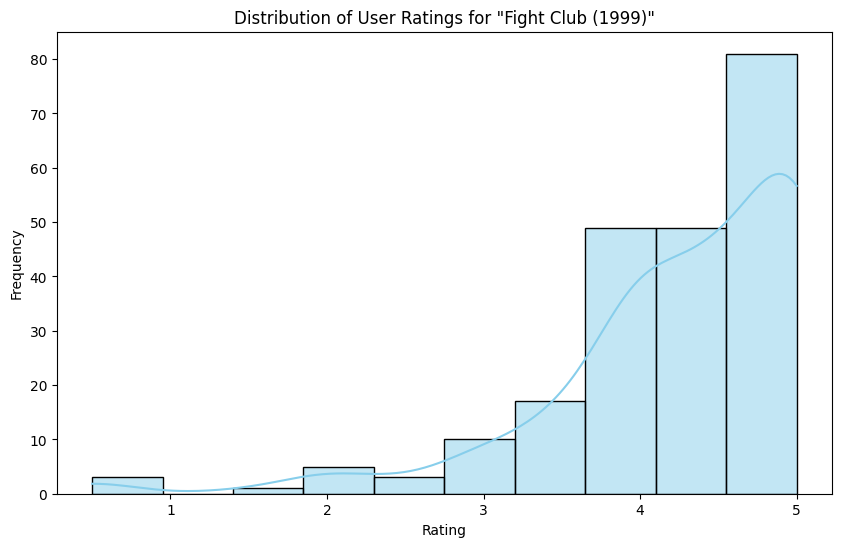

In [30]:

import matplotlib.pyplot as plt
import seaborn as sns

fight_club_movie_id =d.loc[d['title'] == 'Fight Club (1999)', 'movieId'].values[0]
fight_club_ratings = d3.loc[d3['movieId'] == fight_club_movie_id, 'rating']
plt.figure(figsize=(10, 6))
sns.histplot(fight_club_ratings, bins=10, kde=True, color='skyblue')
plt.title('Distribution of User Ratings for "Fight Club (1999)"')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


In [35]:
import pandas as pd
grouped_ratings = d3.groupby('movieId')['rating'].agg(['count', 'mean']).reset_index()
merged_df = pd.merge(d, grouped_ratings, on='movieId', how='inner')

filtered_movies = merged_df[merged_df['count'] > 50]

print(filtered_movies.head())




   movieId                    title  \
0        1         Toy Story (1995)   
1        2           Jumanji (1995)   
2        3  Grumpier Old Men (1995)   
5        6              Heat (1995)   
6        7           Sabrina (1995)   

                                        genres  count      mean  
0  Adventure|Animation|Children|Comedy|Fantasy    215  3.920930  
1                   Adventure|Children|Fantasy    110  3.431818  
2                               Comedy|Romance     52  3.259615  
5                        Action|Crime|Thriller    102  3.946078  
6                               Comedy|Romance     54  3.185185  


In [36]:

most_popular_movie = filtered_movies.loc[filtered_movies['mean'].idxmax()]

print(f'The most popular movie based on average user ratings is: {most_popular_movie["title"]} with an average rating of {most_popular_movie["mean"]:.2f}')


The most popular movie based on average user ratings is: Shawshank Redemption, The (1994) with an average rating of 4.43


In [37]:

top_movies_by_ratings = filtered_movies.sort_values(by='count', ascending=False).head(5)

print("Top 5 popular movies based on number of user ratings:")
print(top_movies_by_ratings[['title', 'count']])


Top 5 popular movies based on number of user ratings:
                                 title  count
314                Forrest Gump (1994)    329
277   Shawshank Redemption, The (1994)    317
257                Pulp Fiction (1994)    307
510   Silence of the Lambs, The (1991)    279
1938                Matrix, The (1999)    278


In [39]:

sci_fi_movies = filtered_movies[filtered_movies['genres'].str.contains('Sci-Fi', case=False, na=False)]

sorted_sci_fi_movies = sci_fi_movies.sort_values(by='count', ascending=False)

third_most_popular_sci_fi_movie = sorted_sci_fi_movies.iloc[2]


print(f'The third most popular Sci-Fi movie based on number of user ratings is: {third_most_popular_sci_fi_movie["title"]} with {third_most_popular_sci_fi_movie["count"]} user ratings.')


The third most popular Sci-Fi movie based on number of user ratings is: Jurassic Park (1993) with 238 user ratings.
The third most popular Sci-Fi movie based on number of user ratings is: Jurassic Park (1993) with 238 user ratings.
